In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Real estate.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
data = data.drop(["No"], axis= 1)
# axis 1 means deleting the column
# axis 0 means the row
data.describe()
# description basically happen on numerical data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
X = data[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude','X6 longitude']]
y = data['Y house price of unit area']

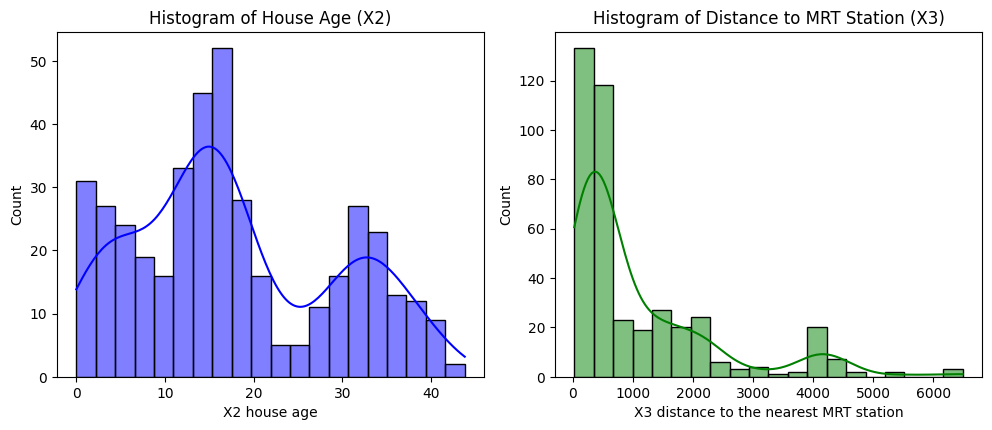

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv("Real estate.csv")

# Plot histograms for selected features
plt.figure(figsize=(15, 8))

# Example: Histogram for house age (X2)
plt.subplot(2, 3, 1)
sns.histplot(data['X2 house age'], bins=20, kde=True, color='blue')
plt.title('Histogram of House Age (X2)')

# Example: Histogram for distance to the nearest MRT station (X3)
plt.subplot(2, 3, 2)
sns.histplot(data['X3 distance to the nearest MRT station'], bins=20, kde=True, color='green')
plt.title('Histogram of Distance to MRT Station (X3)')

# Repeat for other features...

plt.tight_layout()
plt.show()


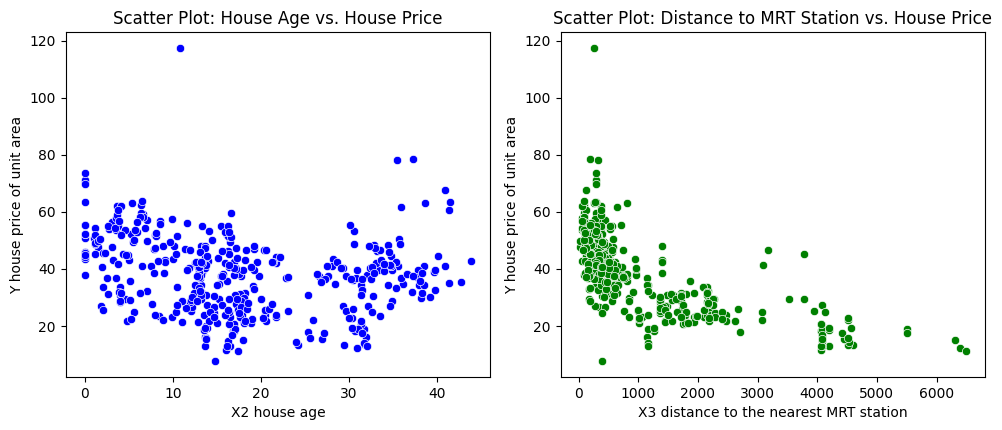

In [10]:
# Plot scatter plots for selected features against the target variable (Y)
import pandas as pd

data = pd.read_csv("Real estate.csv")
plt.figure(figsize=(15, 8))

# Example: Scatter plot for house age (X2) vs. house price (Y)
plt.subplot(2, 3, 1)
sns.scatterplot(x='X2 house age', y='Y house price of unit area', data=data, color='blue')
plt.title('Scatter Plot: House Age vs. House Price')

# Example: Scatter plot for distance to the nearest MRT station (X3) vs. house price (Y)
plt.subplot(2, 3, 2)
sns.scatterplot(x='X3 distance to the nearest MRT station', y='Y house price of unit area', data=data, color='green')
plt.title('Scatter Plot: Distance to MRT Station vs. House Price')

# Repeat for other features...

plt.tight_layout()
plt.show()


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [8]:
linear_reg_predictions = linear_reg_model.predict(X_test)

In [9]:
# Evaluate Linear Regression model
print("Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, linear_reg_predictions))
print("MSE:", mean_squared_error(y_test, linear_reg_predictions))
print("RMSE:", mean_squared_error(y_test, linear_reg_predictions, squared=False))
print("R^2:", r2_score(y_test, linear_reg_predictions))

Linear Regression Metrics:
MAE: 5.305355690074272
MSE: 53.50561912450505
RMSE: 7.314753524521866
R^2: 0.6810580555095769


In [13]:
# Let's perform hyperparameter tuning for the Decision Tree model
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [10]:
# Decision Tree
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [11]:
# Make predictions on the test set
decision_tree_predictions = decision_tree_model.predict(X_test)

In [12]:
# Evaluate Decision Tree model
print("\nDecision Tree Metrics:")
print("MAE:", mean_absolute_error(y_test, decision_tree_predictions))
print("MSE:", mean_squared_error(y_test, decision_tree_predictions))
print("RMSE:", mean_squared_error(y_test, decision_tree_predictions, squared=False))
print("R^2:", r2_score(y_test, decision_tree_predictions))


Decision Tree Metrics:
MAE: 5.607228915662651
MSE: 55.42819277108433
RMSE: 7.445011267357782
R^2: 0.6695977754997487
